### Import relevant packages and open up data files

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [129]:
with open('data/pre90s_Stats_dim6_7clusters.csv','rb') as csvfile:
    reader1 = csv.reader(csvfile)
pre90s_z_cluster_sort = pd.read_csv('data/pre90s_Stats_dim6_7clusters.csv',sep='\t')

with open('data/pre90s_AllStats_dim6_7clusters.csv','rb') as csvfile:
    reader1 = csv.reader(csvfile)
pre90s_all_cluster_sort = pd.read_csv('data/pre90s_AllStats_dim6_7clusters.csv',sep='\t')

with open('data/_10s_Stats_dim6_7clusters.csv','rb') as csvfile:
    reader1 = csv.reader(csvfile)
_10s_z_cluster_sort = pd.read_csv('data/_10s_Stats_dim6_7clusters.csv',sep='\t')

with open('data/_10s_AllStats_dim6_7clusters.csv','rb') as csvfile:
    reader1 = csv.reader(csvfile)
_10s_all_cluster_sort = pd.read_csv('data/_10s_AllStats_dim6_7clusters.csv',sep='\t')

# For pre 1990 data

Since in normalized dataset all the attributes are scaled to the same range, and the relative difference are also scaled to the same range, which makes it easy to have visual comparison.

### Inteprate through normalized dataset

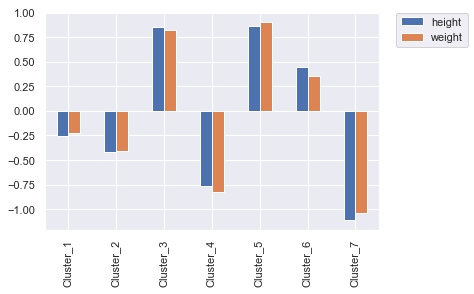

In [130]:
## Sort the players by cluster membership
cluster1 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 0]
cluster2 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 1]
cluster3 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 2]
cluster4 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 3]
cluster5 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 4]
cluster6 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 5]
cluster7 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])
 
## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']

summary_feature1 = summary.loc[['height','weight']]
summary_feature1 = summary_feature1.transpose()
plt.figure()
summary_feature1.plot(kind ='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ## to move the legend outside of plot
plt.show()

## Physical feature assessment of cluster players

#### big players: Cluster_3, Cluster_5, Cluster_6
#### medium players: Cluster_1
#### small players: Cluster_2, Cluster_4, Cluster_7

In [131]:
summary_feature2 = summary.loc[['PTS','AST','TRB','STL','BLK','PF']]
summary_feature2 = summary_feature2.transpose()

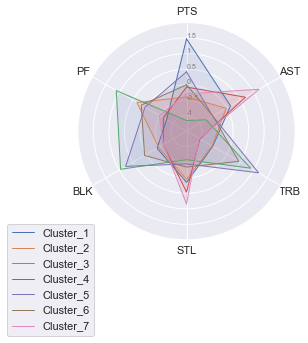

In [132]:
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories=list(summary_feature2)[0:]
N = len(categories) 
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,-0.5,0,0.5,1,1.5], ["-1","-0.5","0","0.5","1","1.5"], color="grey", size=7)
plt.ylim(-1.5,2.0)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=summary_feature2.loc['Cluster_1'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=summary_feature2.loc['Cluster_2'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=summary_feature2.loc['Cluster_3'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind4
values=summary_feature2.loc['Cluster_4'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=summary_feature2.loc['Cluster_5'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_5")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind6
values=summary_feature2.loc['Cluster_6'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_6")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind7
values=summary_feature2.loc['Cluster_7'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_7")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


## Function assessment of cluster players

Cluster_1: medium players particularly strong in scoring

Cluster_2: small players average in all areas

Cluster_3: big players particularly strong in block and rebound, getting fouls

Cluster_4: small players relatively strong in assist and steal

Cluster_5: big players relatively strong in scoring, particularly strong in getting rebounds and blocks

Cluster_6: big players average in all areas

Cluster_7: small players particularly strong in assist and steal

In [133]:
summary_feature3 = summary.loc[['2P','2P%','3P','3P%','FT','FT%']]
summary_feature3 = summary_feature3.transpose()

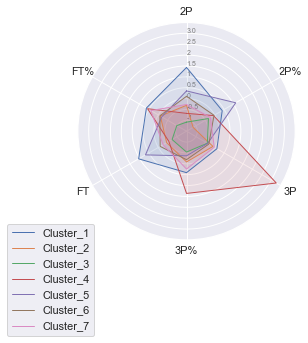

In [134]:
# ------- PART 1: Create background
 
# number of variable
categories=list(summary_feature3)[0:]
N = len(categories) 

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2,2.5,3.0], ["-1","-0.5","0","0.5","1","1.5","2","2.5","3.0"], color="grey", size=7)
plt.ylim(-1.5,3.5)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=summary_feature3.loc['Cluster_1'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=summary_feature3.loc['Cluster_2'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=summary_feature3.loc['Cluster_3'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind4
values=summary_feature3.loc['Cluster_4'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=summary_feature3.loc['Cluster_5'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_5")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind6
values=summary_feature3.loc['Cluster_6'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_6")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind7
values=summary_feature3.loc['Cluster_7'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_7")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

## Scoring assessment of cluster players

Cluster_1: medium players particularly strong at mid-range and drawing free throws

Cluster_2: small players who don't shoot much, average in all areas

Cluster_3: big players who shoot very few, particularly strong in block and rebound, getting fouls

Cluster_4: small players who particularly strong at distant-range, relatively strong in assist and steal

Cluster_5: big players who's relatively strong at mid-range and drawing free throws, particularly strong in getting rebounds and blocks

Cluster_6: big players have well rounded shooting options, average in all areas

Cluster_7: small players have well rounded shooting options, particularly strong in assist and steal

### Inteprate through unnormalized dataset

Unnormalized dataset helps to see the real facts of attributes of each cluster.

In [135]:
cluster1 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 0]
cluster2 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 1]
cluster3 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 2]
cluster4 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 3]
cluster5 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 4]
cluster6 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 5]
cluster7 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 6]

Now, lets look at the characteristics of each cluster by calculating means of each clusters.

In [136]:
#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

In [137]:
##Concatenate the seven dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']
print(summary)

                  Cluster_1    Cluster_2    Cluster_3    Cluster_4  \
Unnamed: 0      1541.205628  1515.448718  1653.393617  2317.096970   
Unnamed: 0.1    4764.547619  4738.641026  4877.082979  5543.309091   
Unnamed: 0.1.1  7244.545455  7209.115385  7407.400000  8381.460606   
Year            1983.597403  1983.461538  1984.055319  1986.684848   
Age               26.632035    25.407051    26.968085    27.393939   
G                 75.564935    55.903846    67.778723    71.036364   
MP              2411.932900   755.195513  1232.202128  1714.442424   
PER                0.292695     0.525880     0.359190     0.332647   
TS%                0.549195     0.469244     0.504615     0.532170   
3PAr               0.030271     0.035266     0.007772     0.233642   
FTr                0.317238     0.267676     0.368143     0.229073   
ORB%               5.388528     5.256410     9.309787     3.130303   
DRB%               9.696753     9.654808    18.483617     7.754545   
TRB%               7

### Extra things to notice for each cluster:

Cluster_1: one of the group played longest time, has the highest USG%(usage rate), which means take the most percentage of team plays while he on the floor.

Cluster_2: G(games played) and MP(minutes played) is signifcantly lower than other clusters

Cluster_3: one of the groups that are tallest and heaviest among all, but played shortest time

Cluster_5: one of the groups that are tallest and heaviest among all, and played longest time

### Observation so far for pre1990s players

#### Cluster_1: medium players particularly strong at mid-range and drawing free throws, take longest playing minutes, and most team plays 
#### Cluster_2: small players who don't shoot much, have limited playing minutes

#### Cluster_3: big players who shoot very few, particularly strong in block and rebound, getting fouls, have limited playing time

#### Cluster_4: small players who particularly strong at distant-range, relatively strong in assist and steal 

#### Cluster_5: big players who's relatively strong at mid-range and drawing free throws, particularly strong in getting rebounds and blocks, play long minutes
#### Cluster_6: big players have well rounded shooting options, average in all areas
#### Cluster_7: small players have well rounded shooting options, particularly strong in assist and steal

## Who are in each clusters

We can also understand the character of each cluster by selecting prominent players in each cluster. Here I use minutes played(MP) as the criteria for elite players, since usually the elite players are given more opportunites to carry the game. 

### 1. Middle man that carried the team

In [138]:
cluster1.loc[cluster1['MP'] >= 2800]['Player'].unique()

array(['Rolando Blackman', 'Michael Jordan', 'Adrian Dantley', 'Fat Lever',
       'Kelly Tripucka', 'Larry Kenon', 'Jamaal Wilkes', 'Alex English',
       'Gus Williams', 'Reggie Theus', 'Eddie Johnson', 'Calvin Murphy',
       'Dominique Wilkins', 'Isiah Thomas', 'M.L. Carr', 'Otis Birdsong',
       'Greg Ballard', 'James Worthy', 'George Gervin', 'Alvin Robertson',
       'World B.', 'Byron Scott', 'Julius Erving', 'Larry Bird',
       'Kiki Vandeweghe', 'Toby Knight', 'Dale Ellis', 'Dennis Johnson',
       'Xavier McDaniel', 'Bernard King', 'Purvis Short', 'Magic Johnson',
       'Dan Issel', 'Ron Harper', 'Tom Chambers', 'Campy Russell',
       'Clyde Drexler', 'Randy Smith', 'Sidney Moncrief', 'Mike Mitchell',
       'Thurl Bailey', 'Scott Wedman', 'Derrick McKey', 'Chris Mullin',
       'Orlando Woolridge', 'Chuck Person', 'Micheal Ray', 'Rick Barry',
       'Paul Pressey', 'Mike Newlin', 'Calvin Natt', 'Marques Johnson',
       'David Thompson', 'Joe Barry', 'Phil Smith', 'Terr

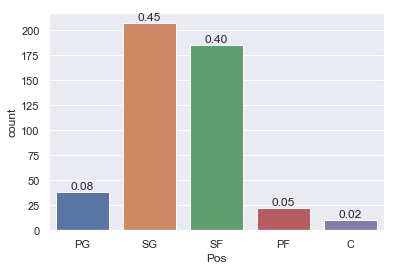

In [139]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Pos", data=cluster1,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Many of them are well known players who are the pillers of the team, with very well balanced skill sets, mainly are SG and SF, which stand for 85% of player number.

like Isiah Thomas, George Gervin, Julius Erving, Magic Johnson.

### 2. Well-rounded small players with limited playing time

In [43]:
cluster2.loc[cluster2['MP'] >= 1100]['Player'].unique()

array(['Steve Harris', 'Albert King', 'Jon Sundvold', 'Roy Hamilton',
       'Carl Nicks', 'Lancaster Gordon', 'Ron Boone', 'Junior Bridgeman',
       'Nick Weatherspoon', 'Jim Paxson', 'Charlie Scott', 'Armond Hill',
       'Raymond Townsend', 'Tyrone Corbin', 'John Williamson',
       'Marty Byrnes', 'Bob Wilkerson', 'Ralph Simpson', 'Terry Teagle',
       'Joe Wolf', 'David Wingate', 'Winford Boynes', 'Purvis Short',
       'Derek Smith', 'John Long', 'Randy Wittman', 'Charles Johnson',
       'Norm Nixon', 'Curtis Rowe', 'Earl Tatum', 'Jo Jo', 'Pete Maravich',
       'Ben McDonald', 'Dennis Hopson'], dtype=object)

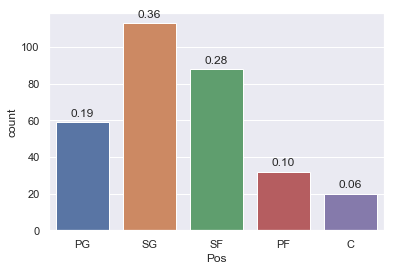

In [140]:
ax = sns.countplot(x="Pos", data=cluster2,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster2))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

These players are in general less well known, position wise are more well spread all across.
PG, SG, SF takes 83% of player population.

### 3. Defensive big man who does the phyical work

In [144]:
cluster3.loc[cluster3['MP'] >= 1900]['Player'].unique()

array(['Truck Robinson', 'Dave Greenwood', 'Tree Rollins',
       'Caldwell Jones', 'Clemon Johnson', 'Wes Unseld', 'Larry Smith',
       'Rick Mahorn', 'Mark Eaton', 'Jeff Cook', 'T.R. Dunn',
       'Jeff Wilkins', 'Kurt Nimphius', 'Alton Lister', 'Danny Vranes',
       'Wayne Cooper', 'Mark Landsberger', 'Sidney Green',
       'George Johnson', 'Clifford Ray', 'Paul Silas', 'Benoit Benjamin',
       'Jan Van', 'Marvin Webster', 'Gar Heard', 'Sam Lacey',
       'Herb Williams', 'Rony Seikaly', 'Earl Cureton', 'Sidney Wicks',
       'Scott Lloyd', 'Manute Bol', 'Dave Corzine'], dtype=object)

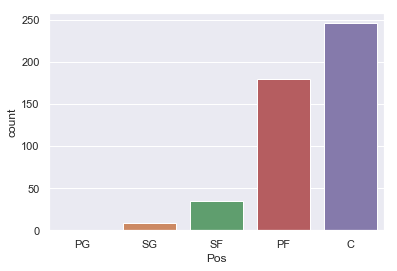

In [147]:
ax = sns.countplot(x="Pos", data=cluster3,order=["PG", "SG", "SF","PF","C"])


These are the big men that do not get too much audience attention as their roles are not as eye-catching. 
C and PF stand for the majority.

### 4. Distant range shooter

In [50]:
cluster4.loc[cluster4['MP'] >= 2200]['Player'].unique()

array(['Michael Cooper', 'Derek Harper', 'Michael Adams', 'Danny Ainge',
       'Mark Jackson', 'Jeff Hornacek', 'John Paxson', 'Jack Sikma',
       'Gerald Wilkins', 'Mike Woodson', 'Byron Scott', 'Doc Rivers',
       'Reggie Miller', 'Johnny Newman', 'Terry Porter', 'Harold Pressley',
       'Mark Price', 'Robert Reid', 'Sleepy Floyd', 'John Bagley',
       'Brad Davis', 'Chuck Person', 'Darrell Griffith', 'Dale Ellis',
       'Craig Hodges', 'Hersey Hawkins', 'Rex Chapman', 'Kyle Macy',
       'Brian Taylor', 'John Roche', 'Mike Bratz', 'Don Buse'], dtype=object)

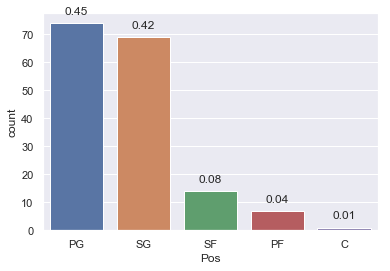

In [148]:
ax = sns.countplot(x="Pos", data=cluster4,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster4))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

We see some well known 3-point shooters like Michael Adams, Reggie Miller. 
PG and SG stand for 87% of the total number.

### 5. Elite big man with all traits

In [52]:
cluster5.loc[cluster5['MP'] >= 3000]['Player'].unique()

array(['Larry Bird', 'Moses Malone', 'James Donaldson', 'Buck Williams',
       'Rodney McCray', 'Truck Robinson', 'Ralph Sampson',
       'Charles Barkley', 'Kareem Abdul-Jabbar', 'Otis Thorpe',
       'Artis Gilmore', 'Dave Cowens', 'Bob McAdoo', 'Karl Malone',
       'Elvin Hayes', 'Hakeem Olajuwon', 'Bill Cartwright', 'Kevin McHale',
       'Jeff Ruland', 'Mychal Thompson', 'Jack Sikma'], dtype=object)

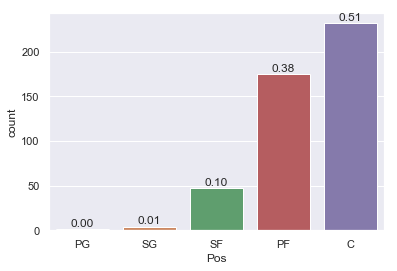

In [149]:
ax = sns.countplot(x="Pos", data=cluster5,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster5))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

All the famous big men who was once the team carriers like Larry Bird, Moses Malone, Karl Malone, Hakeem Olajuwon gathered in this cluster. PF and C stand for 89% of the total number.

### 6. Well-rounded big man

In [151]:
cluster6.loc[cluster6['MP'] >= 2600]['Player'].unique()

array(['Calvin Natt', 'Larry Kenon', 'Elvin Hayes', 'Kevin Duckworth',
       'Cliff Robinson', 'Greg Ballard', 'Robert Reid', 'Truck Robinson',
       'Sonny Parker', 'Dave Greenwood', 'Terry Tyler', 'Lonnie Shelton',
       'Rudy Tomjanovich', 'Jamaal Wilkes', 'Nick Weatherspoon',
       'Toby Knight', 'Tom Chambers', 'Dennis Johnson', 'Mike Gminski',
       'Charles Oakley', 'Sam Perkins', 'Chuck Person', 'Alex English',
       'Dave Corzine', 'Jim Chones', 'Joe Barry', 'T.R. Dunn',
       'Mychal Thompson', 'Ben Poquette', 'Ken Norman', 'Mike Bantom',
       'Reggie King', 'Michael Brooks', 'Mickey Johnson', 'Mike Mitchell',
       'Xavier McDaniel', 'Jerome Kersey', 'Rodney McCray', 'Horace Grant',
       'Tom LaGarde'], dtype=object)

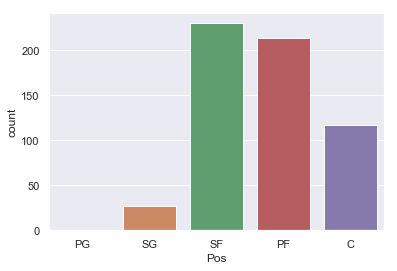

In [153]:
ax = sns.countplot(x="Pos", data=cluster6,order=["PG", "SG", "SF","PF","C"])

This group is similar to the group above, have well-rounded skillsets, but with less prominent unique functions. 
SF, PF and C stand for the majority.

### 7. Small players with all traits

In [155]:
cluster7.loc[cluster7['MP'] >= 2700]['Player'].unique()

array(['Rickey Green', 'Norm Nixon', 'John Stockton', 'Isiah Thomas',
       'Kevin Porter', 'Ricky Sobers', 'John Havlicek', 'Johnny Davis',
       'Bob Wilkerson', 'Lionel Hollins', 'Wilbur Holland', 'Terry Porter',
       'Kenny Smith', 'Chris Ford', 'John Lucas', 'Geoff Huston',
       'Phil Ford', 'Maurice Cheeks', 'Vern Fleming', 'Sleepy Floyd',
       'Kyle Macy', 'Gus Williams', 'Micheal Ray', 'Paul Pressey',
       'Jay Humphries', 'Dennis Johnson', 'Campy Russell',
       'Tiny Archibald', 'Ron Brewer', 'Mark Jackson', 'Reggie Theus',
       'Joe Dumars', 'Randy Wittman'], dtype=object)

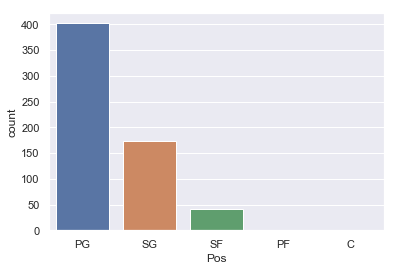

In [157]:
ax = sns.countplot(x="Pos", data=cluster7,order=["PG", "SG", "SF","PF","C"])

These are the ball handelers, most well know among them is probably John Stockton. PG and SG stand for the majority

## Repeat similar approach for post 2010 data

#### Inteprate through normalized dataset

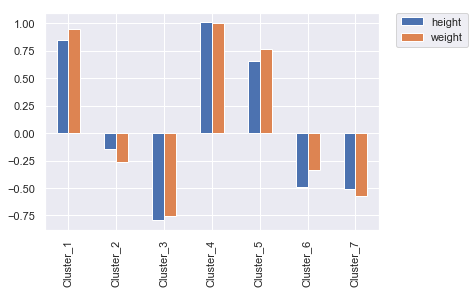

In [158]:
## Sort the players by cluster membership
cluster1 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 0]
cluster2 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 1]
cluster3 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 2]
cluster4 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 3]
cluster5 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 4]
cluster6 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 5]
cluster7 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])
 
## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']

summary_feature1 = summary.loc[['height','weight']]
summary_feature1 = summary_feature1.transpose()
plt.figure()
summary_feature1.plot(kind ='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ## to move the legend outside of plot
plt.show()

## Physical feature assessment of cluster players

#### large players: Cluster_1, Cluster_4, Cluster_5
#### medium players: Cluster_2
#### small players: Cluster_3, Cluster_6, Cluster_7

In [159]:
summary_feature2 = summary.loc[['PTS','AST','TRB','STL','BLK','PF']]
summary_feature2 = summary_feature2.transpose()

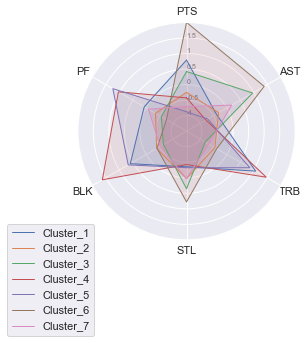

In [160]:
# ------- PART 1: Create background
 
# number of variable
categories=list(summary_feature2)[0:]
N = len(categories) 
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,-0.5,0,0.5,1,1.5], ["-1","-0.5","0","0.5","1","1.5"], color="grey", size=7)
plt.ylim(-1.5,2.0)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=summary_feature2.loc['Cluster_1'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=summary_feature2.loc['Cluster_2'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=summary_feature2.loc['Cluster_3'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind4
values=summary_feature2.loc['Cluster_4'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=summary_feature2.loc['Cluster_5'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_5")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind6
values=summary_feature2.loc['Cluster_6'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_6")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind7
values=summary_feature2.loc['Cluster_7'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_7")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

## Function assessment of cluster players

Cluster_1: big players well-rounded in all areas

Cluster_2: medium players average in all areas

Cluster_3: small players relatively strong in assisting and stealing

Cluster_4: big players exceptionaly strong in rebounding and blocking

Cluster_5: big players particularly strong in rebounding and blocking, and and also getting fouls

Cluster_6: small players particularly strong in scoring, assisting and stealing

Cluster_7: small players average in all areas

In [161]:
summary_feature3 = summary.loc[['2P','2P%','3P','3P%','FT','FT%']]
summary_feature3 = summary_feature3.transpose()

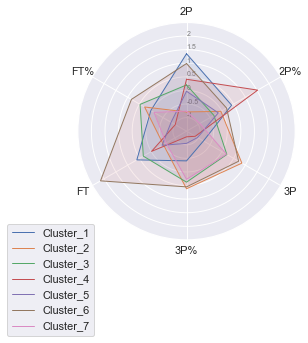

In [162]:
# ------- PART 1: Create background
 
# number of variable
categories=list(summary_feature3)[0:]
N = len(categories) 
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2], ["-1","-0.5","0","0.5","1","1.5","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=summary_feature3.loc['Cluster_1'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=summary_feature3.loc['Cluster_2'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=summary_feature3.loc['Cluster_3'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind4
values=summary_feature3.loc['Cluster_4'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=summary_feature3.loc['Cluster_5'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_5")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind6
values=summary_feature3.loc['Cluster_6'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_6")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind7
values=summary_feature3.loc['Cluster_7'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_7")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

## Scoring assessment of cluster players

Cluster_1: big players who shoot mid-range and free throw often, well-rounded in all areas

Cluster_2: medium players who focus more on three points shooting, average in all areas

Cluster_3: small players have well rounded shooting options, relatively strong in assisting and stealing

Cluster_4: big players have good under basket shoots, bad at free throws, exceptionaly strong in rebounding and blocking

Cluster_5: big players who don't shoot much, but particularly strong in rebounding and blocking, and and also getting fouls

Cluster_6: small players who's exceptionally strong in all kinds of shooting, assisting and stealing

Cluster_7: small players focus more on three points shooting, average in all areas

### Inteprate through unnormalized dataset

In [163]:
cluster1 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 0]
cluster2 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 1]
cluster3 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 2]
cluster4 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 3]
cluster5 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 4]
cluster6 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 5]
cluster7 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

##Concatenate the three dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']
print(summary)

                   Cluster_1     Cluster_2     Cluster_3     Cluster_4  \
Unnamed: 0      10661.908587  10808.393855  10434.600783  10774.371930   
Unnamed: 0.1    13991.357341  14139.990223  13760.814090  14105.371930   
Unnamed: 0.1.1  22324.869806  22581.113128  21930.203523  22519.617544   
Year             2013.548476   2014.009777   2012.911937   2013.922807   
Age                26.681440     27.444134     26.009785     26.364912   
G                  70.155125     68.856145     67.868885     66.659649   
MP               1998.315789   1701.976257   1904.497065   1455.133333   
PER                 0.360997      0.303808      0.311230      0.489106   
TS%                 0.546751      0.549951      0.525432      0.589077   
3PAr                0.077820      0.460113      0.269781      0.017568   
FTr                 0.310623      0.202123      0.267333      0.445663   
ORB%                8.548753      3.218296      2.488454     11.407368   
DRB%               21.224377     12.62

### Extra things to notice for each cluster:

Cluster_1: one of the groups that are tallest and heaviest

Cluster_4: one of the groups that are tallest and heaviest

Cluster_6: one of the group played longest time, has the highest USG%(usage rate)

Cluster_7: G(games played) and MP(minutes played) is signifcantly lower than other clusters

### Observation so far for post 2010 players

#### Cluster_1: big players who shoot mid-range and free throw often, well-rounded in all areas
#### Cluster_2: medium players who focus more on three points shooting, average in all areas
#### Cluster_3: small players have well rounded shooting options, relatively strong in assisting and stealing
#### Cluster_4: big players have good under basket shoots, bad at free throws, exceptionaly strong in rebounding and blocking
#### Cluster_5: big players who don't shoot much, but particularly strong in rebounding and blocking, and and also getting fouls
#### Cluster_6: small players who's exceptionally strong in all kinds of shooting, assisting and stealing, have highest usage
#### Cluster_7: small players focus more on three points shooting, average in all areas, less game time compare to other groups

## Who are in each clusters

As before we try to understand the character of each cluster by selecting prominent players in each cluster. 

### 1. Big man with all traits

In [164]:
cluster1.loc[cluster1['MP'] >= 2500]['Player'].unique() 

array(['Marc Gasol', 'Pau Gasol', 'Blake Griffin', 'Kevin Love',
       'Al Horford', 'Lamar Odom', 'Zach Randolph', 'Paul Millsap',
       'Tristan Thompson', 'LaMarcus Aldridge', 'Giannis Antetokounmpo',
       'Brook Lopez', 'David Lee', 'Al Jefferson', 'David West',
       'Serge Ibaka', 'Gerald Wallace', "Amar'e Stoudemire", 'Josh Smith',
       'Luis Scola', 'Andre Drummond', 'Nikola Vucevic', 'Elton Brand',
       'Chris Bosh', 'Joakim Noah', 'Greg Monroe', 'Carlos Boozer',
       'Rudy Gay', 'Marcin Gortat', 'Thaddeus Young', 'Anthony Davis',
       'Gorgui Dieng', 'Dirk Nowitzki', 'Andrea Bargnani',
       'Karl-Anthony Towns', 'Myles Turner', 'Luol Deng', 'Chris Kaman'], dtype=object)

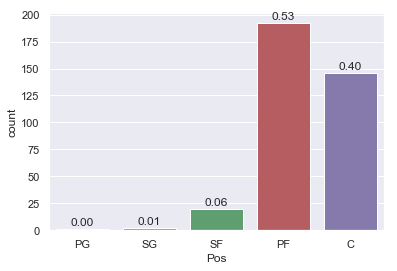

In [165]:
ax = sns.countplot(x="Pos", data=cluster1,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

The big men with various scoring skills, like Marc Gasol, Blake Griffin, Kevin Love, Dirk Nowitzki.
PF and C stand for 93% of the cluster members.

### 2. Three-point shooter, outside defender

In [90]:
cluster2.loc[cluster2['MP'] >= 2400]['Player'].unique()

array(['Nicolas Batum', 'Trevor Ariza', 'Jose Calderon', 'Jimmy Butler',
       'Corey Brewer', 'Joe Johnson', 'Kyle Korver', 'Draymond Green',
       'Shawn Marion', 'Wesley Matthews', 'Jodie Meeks', 'Khris Middleton',
       'Tobias Harris', 'Mike Dunleavy', 'Randy Foye', 'George Hill',
       'Metta World', 'Alonzo Gee', 'Klay Thompson', 'Ryan Anderson',
       'Courtney Lee', 'Tayshaun Prince', 'Chandler Parsons',
       'Otto Porter', 'Marcus Morris', 'P.J. Tucker',
       'Kentavious Caldwell-Pope', 'Avery Bradley', 'Evan Fournier',
       'Rodney Hood', 'Gary Harris', 'J.J. Redick', 'Wilson Chandler',
       'Arron Afflalo', 'J.R. Smith', 'Lance Stephenson', 'Ben McLemore',
       'Luol Deng', 'Boris Diaw', 'Jason Richardson', 'Jeff Green',
       'Jason Kidd', 'Rasual Butler', 'Richard Jefferson', 'Grant Hill',
       'Landry Fields', 'Channing Frye', 'Ray Allen', 'Marvin Williams',
       'Dorell Wright', 'Brandon Rush', 'Danilo Gallinari'], dtype=object)

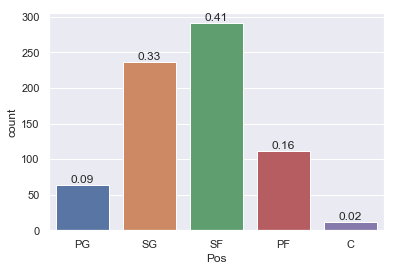

In [167]:
ax = sns.countplot(x="Pos", data=cluster2,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster2))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

This group gathers best distant shooters, and outside range defender, which is commonly refered as 3D in these days terms, like Klay Thompson, Ryan Anderson, J.J. Redick, Ray Allen, Kyle Korver. SG, SF, and PF stand for 90% of the total number

### 3. Outside assistant

In [168]:
cluster3.loc[cluster3['MP'] >= 2600]['Player'].unique()

array(['Kemba Walker', 'Monta Ellis', 'Andre Iguodala', 'Thaddeus Young',
       'Wesley Matthews', 'John Wall', 'Jeff Green', 'Beno Udrih',
       'Gordon Hayward', 'Rudy Gay', 'Brandon Jennings', 'Tyreke Evans',
       'Josh Smith', 'Andre Miller', 'Raymond Felton', 'Ricky Rubio',
       'Andrew Wiggins', 'John Salmons', 'Khris Middleton',
       'C.J. McCollum', 'Russell Westbrook', 'D.J. Augustin',
       'Derrick Rose', 'Rajon Rondo', 'Devin Booker', 'Joe Johnson',
       'Nicolas Batum', 'Harrison Barnes', 'Stephen Jackson',
       'Jrue Holiday', 'DeMar DeRozan', 'Mike Conley', 'Ty Lawson',
       'O.J. Mayo', 'Aaron Brooks', 'Damian Lillard', 'Paul George',
       'Jeremy Lin', 'J.R. Smith', 'Jeff Teague', 'Trevor Ariza',
       'Luol Deng', 'Stephen Curry', 'Evan Turner', 'Greivis Vasquez'], dtype=object)

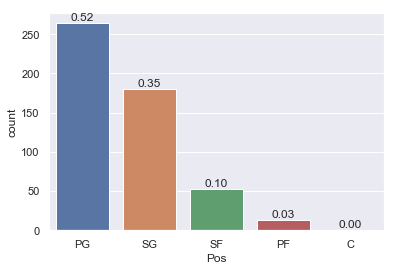

In [169]:
ax = sns.countplot(x="Pos", data=cluster3,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster3))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Smaller players, mostly PGs focus on ball handling, not much as shooting, like Ricky Rubio, Rajon Rondo, John Wall. PG and SG stand for 87% of the total number.

### 4. Under basket offender, ring protector

In [85]:
cluster4.loc[cluster4['MP'] >= 1900]['Player'].unique()

array(['Hassan Whiteside', 'Kenneth Faried', 'Timofey Mozgov',
       'Dwight Howard', 'Tristan Thompson', 'Reggie Evans', 'Amir Johnson',
       'Marcin Gortat', 'Rudy Gobert', 'Chuck Hayes', 'Mason Plumlee',
       'Nene Hilario', 'Serge Ibaka', 'Steven Adams', 'DeAndre Jordan',
       'Marc Gasol', 'Taj Gibson', 'Zaza Pachulia', 'Gorgui Dieng',
       'Robin Lopez', 'Joakim Noah', 'Anderson Varejao', 'Ben Wallace',
       'Emeka Okafor', 'Jonas Valanciunas', 'Tyson Chandler',
       'Andrew Bogut', 'Kendrick Perkins', 'Andre Drummond', 'Omer Asik',
       'JaMychal Green', 'Tiago Splitter', 'Brendan Haywood',
       'Miles Plumlee', 'Greg Monroe', 'Larry Sanders', 'Samuel Dalembert',
       'Kris Humphries', 'JaVale McGee'], dtype=object)

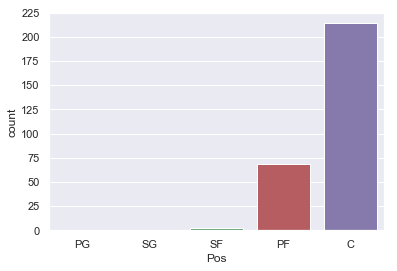

In [86]:
ax = sns.countplot(x="Pos", data=cluster4,order=["PG", "SG", "SF","PF","C"])

The big men more well-known for defensive purpose and using physical body contact, not as much in scoring, like Zaza Pachulia, Andrew Bogut, Tristan Thompson, Andre Drummond, Rudy Gobert.

### 5. In between big men

In [171]:
cluster5.loc[cluster5['MP'] >= 1600]['Player'].unique()

array(['Lavoy Allen', 'Tony Allen', 'Luc Mbah', 'Al-Farouq Aminu',
       'Jason Thompson', 'Kwame Brown', 'Brandon Bass', 'Kendrick Perkins',
       'Darko Milicic', 'Bismack Biyombo', 'Roy Hibbert', 'Spencer Hawes',
       'Chuck Hayes', 'Alex Len', 'Glen Davis', 'Kevin Seraphin',
       'Jerami Grant', 'Dante Cunningham', 'Evan Turner', 'Jason Maxiell',
       'Kenyon Martin', 'Taj Gibson', 'Tyler Zeller', 'Antonio McDyess',
       'Yi Jianlian', 'Jonas Jerebko', 'Michael Kidd-Gilchrist',
       'Jason Smith', 'Juwan Howard', 'Samuel Dalembert', 'Joakim Noah',
       'Nerlens Noel', 'Lamar Odom', 'Markieff Morris'], dtype=object)

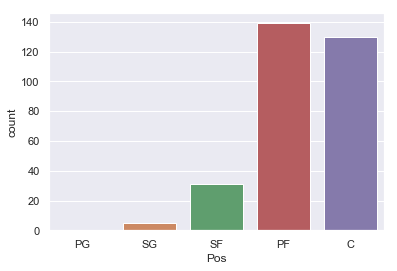

In [173]:
ax = sns.countplot(x="Pos", data=cluster5,order=["PG", "SG", "SF","PF","C"])

These big men might be less well-known, have mixed skill in both ring protection and inside attact, 
such as Lamar Odom, Tony Allen, Taj Gibson. C and PF stand for majority of the total number.

### 6. Elite player who carries the team

In [174]:
cluster6.loc[cluster6['MP'] >= 2500]['Player'].unique()

array(['Kyrie Irving', 'Damian Lillard', 'Bradley Beal', 'Jeff Teague',
       'Kyle Lowry', 'DeMar DeRozan', 'Isaiah Thomas', 'Jimmy Butler',
       'Steve Nash', 'Gordon Hayward', 'Kemba Walker', 'John Wall',
       'Kevin Durant', 'James Harden', 'Russell Westbrook', 'LeBron James',
       'Marc Gasol', 'Stephen Curry', 'C.J. McCollum', 'Paul George',
       'Carmelo Anthony', 'Kobe Bryant', 'Giannis Antetokounmpo',
       'Klay Thompson', 'Eric Bledsoe', 'Goran Dragic', 'Kevin Martin',
       'Danny Granger', 'Paul Pierce', 'Chris Paul', 'Deron Williams',
       'Kevin Love', 'Dwyane Wade', 'Tony Parker', 'Draymond Green',
       'Dirk Nowitzki', 'Derrick Rose'], dtype=object)

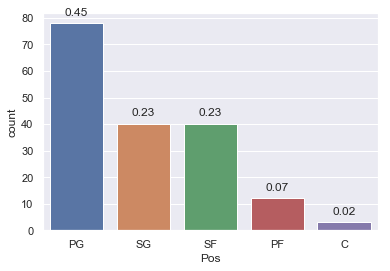

In [175]:
ax = sns.countplot(x="Pos", data=cluster6,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster6))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

This group gathers the players get the most spotlights, they are the hot candidates for MVP, many are players can play multiple positions, like LeBron James, Kobe Bryant, James Harden, Kevin Durant, Derrick Rose, Russell Westbrook. PG, SG and SF stand for 90% of the total number.

### 7. Secondary ball handler, 3-point shooter

In [80]:
cluster7.loc[cluster7['MP'] >= 1500]['Player'].unique()

array(['Evan Turner', 'Brandon Ingram', 'Chris Duhon', 'Brandon Jennings',
       'Earl Watson', 'Giannis Antetokounmpo', 'Norris Cole',
       'Michael Beasley', 'Domantas Sabonis', 'Isaiah Whitehead',
       'Charlie Bell', 'Derek Fisher', 'Sergio Rodriguez', 'Kirk Hinrich',
       "E'Twaun Moore", 'Kendall Marshall', 'Nik Stauskas', 'Steve Blake',
       'Marco Belinelli', 'Corey Brewer', 'Lance Stephenson',
       'Dion Waiters', 'Iman Shumpert', 'Emmanuel Mudiay', 'Joe Johnson',
       'Stanley Johnson', 'Terrence Williams', 'Randy Foye', 'Monta Ellis',
       'Matthew Dellavedova', 'Jeff Green', 'Ben McLemore',
       'Travis Outlaw', 'Tim Frazier', 'Tayshaun Prince', 'D.J. Augustin',
       'Shane Larkin', 'Luc Mbah', 'Dante Exum'], dtype=object)

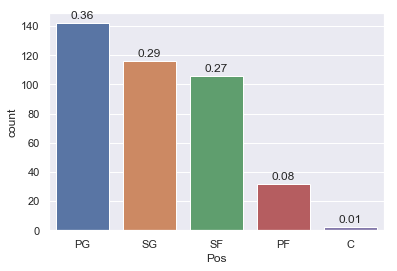

In [176]:
ax = sns.countplot(x="Pos", data=cluster7,order=["PG", "SG", "SF","PF","C"])
total = float(len(cluster7))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

PG, SG and SF take 91% of the total number.

## Summary 

There is obvious change in player style between the two time periods, which has at least 20 years of time gap in between. We have noticed the optimal way to categorize players has become less relavant to the on-court postions, since before 1990 two of the seven clusters are mainly represented by 3 position:
2. Well-rounded small players with limited playing time - by PG, SG, SF
6. Well-rounded big man - by SF, PF, C

After 2010 three of the seven clusters are mainly represented by 3 positions:
2. Three-point shooter, outside defender - by SG, SF, PF
6. Elite player who carries the team - by PG, SG, SF
7. Secondary ball handler, 3-point shooter - by PG, SG, SF

I want to see more of changing character and distribution of clusters throughout time,  
we can start by ordering all the clusters according to a fundamental physical feature-average player height, and plot the number of players in each cluster.

### Pre 1990 data

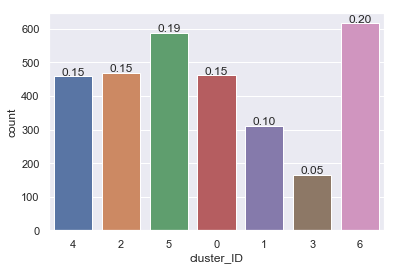

In [104]:
ax = sns.countplot(x="cluster_ID", data=pre90s_all_cluster_sort,order=[4, 2, 5, 0, 1, 3, 6])
total = float(len(pre90s_all_cluster_sort))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

#### 4. Elite big man with all traits, 15%

#### 2. Defensive big man who does the phyical work, 15%

#### 5. Well-rounded big man, 19%

#### 0. Middle man that carried the team, 15%

#### 1. Well-rounded small players with limited playing time, 10%

#### 3. Distant range shooter, 5%

#### 6. Small players with all traits, 20%

### Post 2010 data

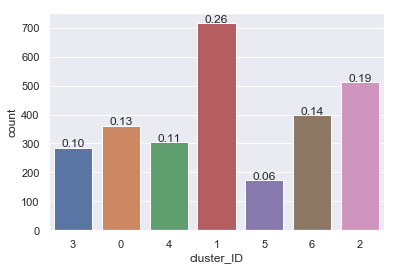

In [105]:
ax = sns.countplot(x="cluster_ID", data=_10s_all_cluster_sort,order=[3, 0, 4, 1, 5, 6, 2])
total = float(len(_10s_all_cluster_sort))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

#### 3. Under basket offender, ring protector, 10%

#### 0. Big man with all traits, 13%

#### 4. Big Defensive inside, 11%

#### 1. Three-point shooter, outside defender, 26%

#### 5. Elite player who carries the team, 6%

#### 6. Secondary ball handler, 3-point shooter, 14%

#### 2. Outside assistant, 19%

We preceive the proportion of big players(the first three clusters) have shrinked signficantly, from 49% before 1990 to 34% after 2010. But we did not observe a drop in player's physical height during the data exploration, it means after 2010 more players tend to play 'small ball', which involves the game shifted towards more outside range, rather than near basket area dominated by big players. It's also explains the most populous cluster in post 2010 data is the 3D(three-pointers plus outside defending) player group, which takes 28% of all player number count. While the cluster in pre 1990 that resambles 3D the most is the (NO.3) Distant range shooter cluster, which only takes 5% of players number.

Another observation is that the team carrier cluster (Middle man that carried the team) before 1990 takes 15% of all number, but the equivalent one (Elite player who carries the team) after 2010 takes only 6% of all player population. 

While besides player number, another way to look at the signifcance of each cluster is through the average player minutes of its members.

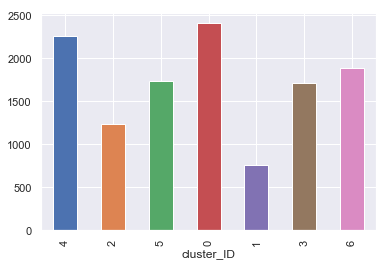

In [125]:
df = pre90s_all_cluster_sort.groupby(['cluster_ID'])['MP'].mean()
order=[4, 2, 5, 0, 1, 3, 6]
df.loc[order].plot(kind = 'bar')

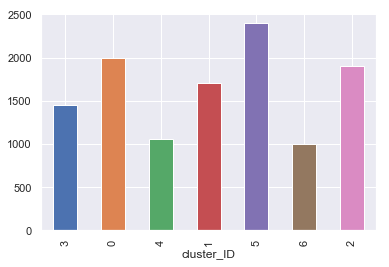

In [126]:
df = _10s_all_cluster_sort.groupby(['cluster_ID'])['MP'].mean()
order=[3, 0, 4, 1, 5, 6, 2]
df.loc[order].plot(kind = 'bar')

From here we can also observe the on-court minutes of smaller players (last three clusters) have increased significantly from pre1990 to post 2010, especailly for the team carrying cluster(5. Elite player who carries the team) for the post 2010 data, though with the fewest members, but have the longest playing time among all groups.

## Final conclusion

The league players are increaslingly more dominated by 'smaller' players, as their number takes the majority of the total population after 2010, it does not mean more players are becoming physically smaller, but means the game is moving away from near-basket towards outside range, which is also explained by the most populous cluster is the 3D(three-pointer plust outside defense) player group after 2010. The average game time for small players have also been getting longer. The increasing blurry of traditional player position within different cluster shows the increased freedom for players to switch between positions, this implies the speed and range of ball movement have increased,rather than simply move towards the big man inside or close to basket. The most elite players have shifted from the middle group to small group also speaks the truth that the playing small has become the trend.   
Therefore we can state the NBA basketball playing style is moving towards 'small ball' after 1990s to 2010s.